In [79]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import scipy

In [80]:
df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [82]:
df.describe(include = 'O')

,holiday,weather_main,weather_description,date_time
count,48204,48204,48204,48204
unique,12,11,38,40575
top,None,Clouds,sky is clear,2013-05-19 10:00:00
freq,48143,15164,11665,6


In [83]:
df.holiday.unique()

array(['None', 'Columbus Day', 'Veterans Day', 'Thanksgiving Day',
       'Christmas Day', 'New Years Day', 'Washingtons Birthday',
       'Memorial Day', 'Independence Day', 'State Fair', 'Labor Day',
       'Martin Luther King Jr Day'], dtype=object)

In [84]:
(df.temp.min(), df.temp.max())

(0.0, 310.07)

In [85]:
# Drop all useless labels from dataframe

In [86]:
df.drop(columns=["rain_1h", "snow_1h", "clouds_all", "weather_main", "weather_description"], inplace=True)
df.holiday = np.where(df.holiday == 'None', 0, 1)
df

,holiday,temp,date_time,traffic_volume
0,0,288.28,2012-10-02 09:00:00,5545
1,0,289.36,2012-10-02 10:00:00,4516
2,0,289.58,2012-10-02 11:00:00,4767
3,0,290.13,2012-10-02 12:00:00,5026
4,0,291.14,2012-10-02 13:00:00,4918
...,...,...,...,...
48199,0,283.45,2018-09-30 19:00:00,3543
48200,0,282.76,2018-09-30 20:00:00,2781
48201,0,282.73,2018-09-30 21:00:00,2159
48202,0,282.09,2018-09-30 22:00:00,1450


In [87]:
df.describe(include = 'O')

,date_time
count,48204
unique,40575
top,2013-05-19 10:00:00
freq,6


In [88]:
# Have we duplicates?

df.duplicated('date_time').any()

True

In [89]:
# Yes, we have! Lets drop it!

df.drop_duplicates('date_time', inplace=True)
df.duplicated('date_time').any()

False

In [90]:
df

,holiday,temp,date_time,traffic_volume
0,0,288.28,2012-10-02 09:00:00,5545
1,0,289.36,2012-10-02 10:00:00,4516
2,0,289.58,2012-10-02 11:00:00,4767
3,0,290.13,2012-10-02 12:00:00,5026
4,0,291.14,2012-10-02 13:00:00,4918
...,...,...,...,...
48199,0,283.45,2018-09-30 19:00:00,3543
48200,0,282.76,2018-09-30 20:00:00,2781
48201,0,282.73,2018-09-30 21:00:00,2159
48202,0,282.09,2018-09-30 22:00:00,1450


In [91]:
df.sort_values(by='date_time', inplace=True)
df

,holiday,temp,date_time,traffic_volume
0,0,288.28,2012-10-02 09:00:00,5545
1,0,289.36,2012-10-02 10:00:00,4516
2,0,289.58,2012-10-02 11:00:00,4767
3,0,290.13,2012-10-02 12:00:00,5026
4,0,291.14,2012-10-02 13:00:00,4918
...,...,...,...,...
48199,0,283.45,2018-09-30 19:00:00,3543
48200,0,282.76,2018-09-30 20:00:00,2781
48201,0,282.73,2018-09-30 21:00:00,2159
48202,0,282.09,2018-09-30 22:00:00,1450


In [92]:
# Now lets check all intervals are 1 hour

all_dates = pd.Series(data=pd.date_range(start=df.date_time.min(), end=df.date_time.max(), freq='h'))
mask = all_dates.isin(df.date_time.values)
all_dates[~mask]

22      2012-10-03 07:00:00
25      2012-10-03 10:00:00
26      2012-10-03 11:00:00
32      2012-10-03 17:00:00
65      2012-10-05 02:00:00
                ...        
49649   2018-06-02 02:00:00
51238   2018-08-07 07:00:00
51239   2018-08-07 08:00:00
51240   2018-08-07 09:00:00
51617   2018-08-23 02:00:00
Length: 11976, dtype: datetime64[ns]

In [93]:
# Check ourselves

print(df['date_time'][21])
print(df['date_time'][22])

2012-10-03 06:00:00
2012-10-03 08:00:00


In [94]:
# As we can see, we have 11976 missing dates!
# So we have to interpolate it

In [95]:
df.set_index('date_time', inplace=True)
df.index = pd.DatetimeIndex(df.index)
df = df.reindex(all_dates, fill_value=np.nan)
df.interpolate(inplace=True)
df.holiday = np.where(df.holiday > 0.5, 1, 0)
df

,holiday,temp,traffic_volume
2012-10-02 09:00:00,0,288.28,5545.0
2012-10-02 10:00:00,0,289.36,4516.0
2012-10-02 11:00:00,0,289.58,4767.0
2012-10-02 12:00:00,0,290.13,5026.0
2012-10-02 13:00:00,0,291.14,4918.0
...,...,...,...
2018-09-30 19:00:00,0,283.45,3543.0
2018-09-30 20:00:00,0,282.76,2781.0
2018-09-30 21:00:00,0,282.73,2159.0
2018-09-30 22:00:00,0,282.09,1450.0


In [21]:
# Check ourselves

print(df['temp'][21])
print(df['temp'][22])

278.23
278.175


In [20]:
# EDM is done. We have all dates, w/o duplicates and similar interval.
# Let's do modelling things

In [22]:
import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots
sns.set()

from scipy.optimize import minimize 
from itertools import product                    # some useful functions
from tqdm import tqdm_notebook

import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

%matplotlib inline

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, TimeSeriesSplit

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


def plot_results(pred, test):
    error = mean_absolute_percentage_error(pred, test)
    
    plt.figure(figsize=(18, 6))
    plt.plot(pred, "g", label="prediction", linewidth=2.0)
    plt.plot(test, label="actual", linewidth=2.0)
    plt.title("Mean absolute percentage error {0:.2f}%".format(error))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True)
    plt.show()

In [23]:
# Split test data from data frame

from datetime import datetime
from dateutil.relativedelta import relativedelta

data_th = df.index.max() - relativedelta(weeks=2)

df_train = df[df.index <= data_th]
df_test  = df[df.index > data_th]

In [24]:
df_train

,holiday,temp,traffic_volume
2012-10-02 09:00:00,0,288.28,5545.0
2012-10-02 10:00:00,0,289.36,4516.0
2012-10-02 11:00:00,0,289.58,4767.0
2012-10-02 12:00:00,0,290.13,5026.0
2012-10-02 13:00:00,0,291.14,4918.0
...,...,...,...
2018-09-16 19:00:00,0,303.02,3400.0
2018-09-16 20:00:00,0,300.78,3092.0
2018-09-16 21:00:00,0,298.90,2623.0
2018-09-16 22:00:00,0,297.85,1725.0


In [25]:
df_test

,holiday,temp,traffic_volume
2018-09-17 00:00:00,0,296.58,550.0
2018-09-17 01:00:00,0,296.19,280.0
2018-09-17 02:00:00,0,295.82,260.0
2018-09-17 03:00:00,0,295.83,344.0
2018-09-17 04:00:00,0,295.68,880.0
...,...,...,...
2018-09-30 19:00:00,0,283.45,3543.0
2018-09-30 20:00:00,0,282.76,2781.0
2018-09-30 21:00:00,0,282.73,2159.0
2018-09-30 22:00:00,0,282.09,1450.0


In [26]:
# Lets see on our data

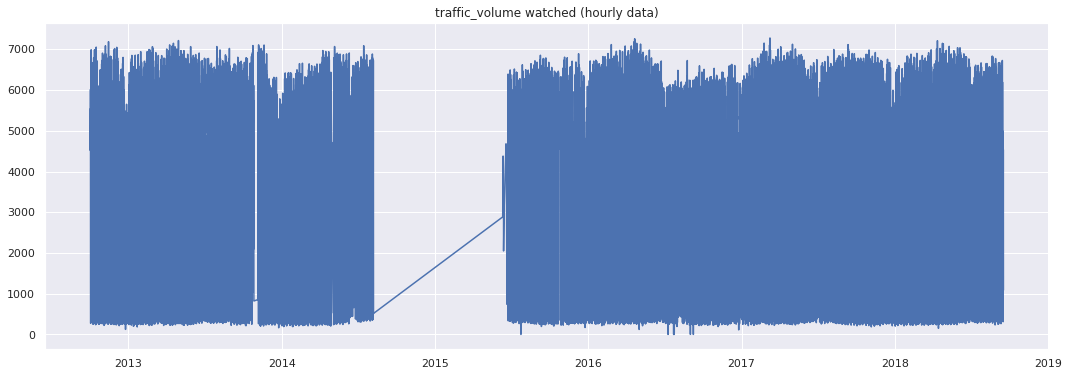

In [27]:
plt.figure(figsize=(18, 6))
plt.plot(df_train.traffic_volume)
plt.title('traffic_volume watched (hourly data)')
plt.grid(True)
plt.show()

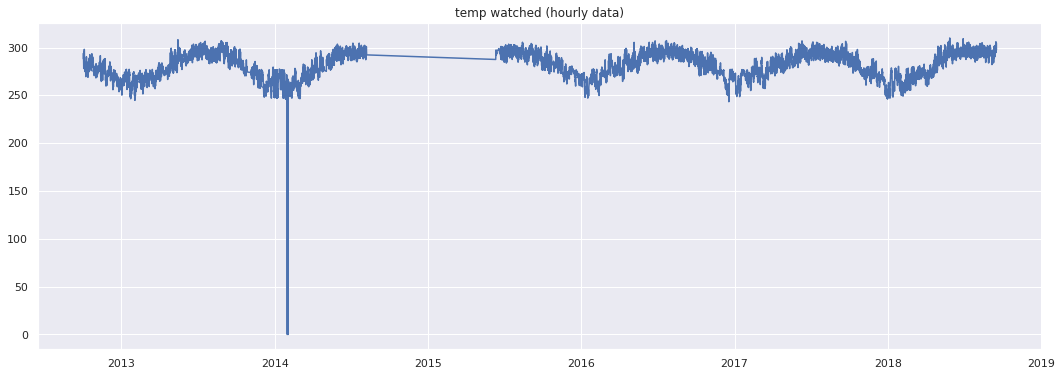

In [28]:
plt.figure(figsize=(18, 6))
plt.plot(df_train.temp)
plt.title('temp watched (hourly data)')
plt.grid(True)
plt.show()

In [28]:
# As we can see, data for 2015 year is broken, so we can easily cut the data by 2018.

In [29]:
from datetime import date

df_train = df_train[df_train.index >= np.datetime64('2018-01-01')]
df_train

,holiday,temp,traffic_volume
2018-01-01 00:00:00,1,249.36,1478.0
2018-01-01 01:00:00,0,249.08,1408.0
2018-01-01 02:00:00,0,248.86,931.0
2018-01-01 03:00:00,0,248.72,585.0
2018-01-01 04:00:00,0,248.43,381.0
...,...,...,...
2018-09-16 19:00:00,0,303.02,3400.0
2018-09-16 20:00:00,0,300.78,3092.0
2018-09-16 21:00:00,0,298.90,2623.0
2018-09-16 22:00:00,0,297.85,1725.0


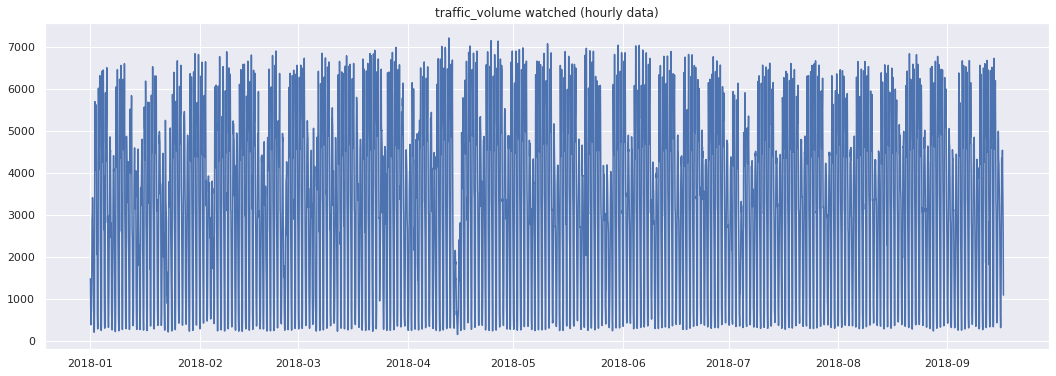

In [30]:
plt.figure(figsize=(18, 6))
plt.plot(df_train.traffic_volume)
plt.title('traffic_volume watched (hourly data)')
plt.grid(True)
plt.show()

In [31]:
# Lets generate additional features: weekday, hour

df_train['hour'] = df_train.index.hour
df_train['weekday'] = df_train.index.weekday

df_test['hour'] = df_test.index.hour
df_test['weekday'] = df_test.index.weekday

df_train

,holiday,temp,traffic_volume,hour,weekday
2018-01-01 00:00:00,1,249.36,1478.0,0,0
2018-01-01 01:00:00,0,249.08,1408.0,1,0
2018-01-01 02:00:00,0,248.86,931.0,2,0
2018-01-01 03:00:00,0,248.72,585.0,3,0
2018-01-01 04:00:00,0,248.43,381.0,4,0
...,...,...,...,...,...
2018-09-16 19:00:00,0,303.02,3400.0,19,6
2018-09-16 20:00:00,0,300.78,3092.0,20,6
2018-09-16 21:00:00,0,298.90,2623.0,21,6
2018-09-16 22:00:00,0,297.85,1725.0,22,6


In [32]:
# Generate baseline prediction

In [33]:
baseline_predict = df_train.groupby(["weekday", "hour"])["traffic_volume"].mean()
baseline_predict

weekday  hour
0        0        663.648649
         1        412.810811
         2        315.108108
         3        360.405405
         4        833.243243
                    ...     
6        19      3096.486486
         20      2831.081081
         21      2488.324324
         22      1866.405405
         23      1230.513514
Name: traffic_volume, Length: 168, dtype: float64

In [34]:
baseline_predict_arr = np.append(baseline_predict.array, baseline_predict.array)

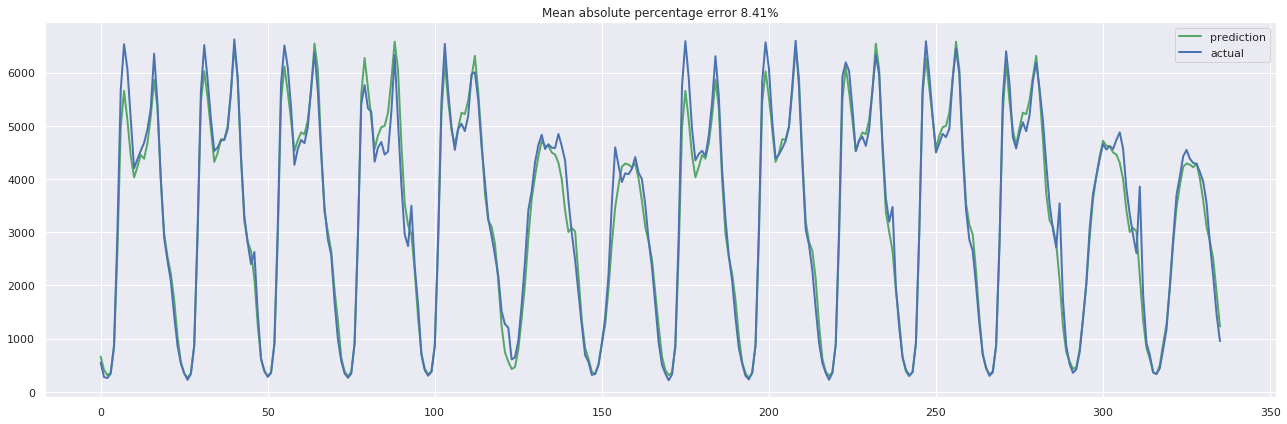

In [35]:
plot_results(baseline_predict_arr, df_test.traffic_volume.values)

In [36]:
# So, the baseline predict got 8.41% of map_error. Lets try to improve it! 

In [37]:
# Holt-Winters

class HoltWinters:
    
    """
    Holt-Winters model with the anomalies detection using Brutlag method
    
    # series - initial time series
    # slen - length of a season
    # alpha, beta, gamma - Holt-Winters model coefficients
    # n_preds - predictions horizon
    # scaling_factor - sets the width of the confidence interval by Brutlag (usually takes values from 2 to 3)
    
    """
    
    
    def __init__(self, series, slen, alpha, beta, gamma, n_preds, scaling_factor=1.96):
        self.series = series
        self.slen = slen
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.n_preds = n_preds
        self.scaling_factor = scaling_factor
        
        
    def initial_trend(self):
        sum = 0.0
        for i in range(self.slen):
            sum += float(self.series[i+self.slen] - self.series[i]) / self.slen
        return sum / self.slen  
    
    def initial_seasonal_components(self):
        seasonals = {}
        season_averages = []
        n_seasons = int(len(self.series)/self.slen)
        # let's calculate season averages
        for j in range(n_seasons):
            season_averages.append(sum(self.series[self.slen*j:self.slen*j+self.slen])/float(self.slen))
        # let's calculate initial values
        for i in range(self.slen):
            sum_of_vals_over_avg = 0.0
            for j in range(n_seasons):
                sum_of_vals_over_avg += self.series[self.slen*j+i]-season_averages[j]
            seasonals[i] = sum_of_vals_over_avg/n_seasons
        return seasonals   

          
    def triple_exponential_smoothing(self):
        self.result = []
        self.Smooth = []
        self.Season = []
        self.Trend = []
        self.PredictedDeviation = []
        self.UpperBond = []
        self.LowerBond = []
        
        seasonals = self.initial_seasonal_components()
        
        for i in range(len(self.series)+self.n_preds):
            if i == 0: # components initialization
                smooth = self.series[0]
                trend = self.initial_trend()
                self.result.append(self.series[0])
                self.Smooth.append(smooth)
                self.Trend.append(trend)
                self.Season.append(seasonals[i%self.slen])
                
                self.PredictedDeviation.append(0)
                
                self.UpperBond.append(self.result[0] + 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])
                
                self.LowerBond.append(self.result[0] - 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])
                continue
                
            if i >= len(self.series): # predicting
                m = i - len(self.series) + 1
                self.result.append((smooth + m*trend) + seasonals[i%self.slen])
                
                # when predicting we increase uncertainty on each step
                self.PredictedDeviation.append(self.PredictedDeviation[-1]*1.01) 
                
            else:
                val = self.series[i]
                last_smooth, smooth = smooth, self.alpha*(val-seasonals[i%self.slen]) + (1-self.alpha)*(smooth+trend)
                trend = self.beta * (smooth-last_smooth) + (1-self.beta)*trend
                seasonals[i%self.slen] = self.gamma*(val-smooth) + (1-self.gamma)*seasonals[i%self.slen]
                self.result.append(smooth+trend+seasonals[i%self.slen])
                
                # Deviation is calculated according to Brutlag algorithm.
                self.PredictedDeviation.append(self.gamma * np.abs(self.series[i] - self.result[i]) 
                                               + (1-self.gamma)*self.PredictedDeviation[-1])
                     
            self.UpperBond.append(self.result[-1] + 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.LowerBond.append(self.result[-1] - 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.Smooth.append(smooth)
            self.Trend.append(trend)
            self.Season.append(seasonals[i%self.slen])
            

            from sklearn.model_selection import TimeSeriesSplit # you have everything done for you

def timeseriesCVscore(params, series, loss_function=mean_squared_error, slen=24):
    """
        Returns error on CV  
        
        params - vector of parameters for optimization
        series - dataset with timeseries
        slen - season length for Holt-Winters model
    """
    # errors array
    errors = []
    
    values = series.values
    alpha, beta, gamma = params
    
    # set the number of folds for cross-validation
    tscv = TimeSeriesSplit(n_splits=3) 
    
    # iterating over folds, train model on each, forecast and calculate error
    for train, test in tscv.split(values):

        model = HoltWinters(series=values[train], slen=slen, 
                            alpha=alpha, beta=beta, gamma=gamma, n_preds=len(test))
        model.triple_exponential_smoothing()
        
        predictions = model.result[-len(test):]
        actual = values[test]
        error = loss_function(predictions, actual)
        errors.append(error)
        
    return np.mean(np.array(errors))

In [38]:
%%time
# initializing model parameters alpha, beta and gamma
x = [0, 0, 0] 

# Minimizing the loss function 
opt = minimize(timeseriesCVscore, x0=x, 
               args=(df_train.traffic_volume, mean_squared_error), 
               method="TNC", bounds = ((0, 1), (0, 1), (0, 1))
              )

# Take optimal values...
alpha_final, beta_final, gamma_final = opt.x
print(alpha_final, beta_final, gamma_final)

0.005785272161198063 0.005114500779961839 0.0
CPU times: user 1min 24s, sys: 295 ms, total: 1min 24s
Wall time: 1min 24s


In [39]:
# ...and train the model with them, forecasting for the next 50 hours
model = HoltWinters(df_train.traffic_volume, slen = 24, 
                    alpha = alpha_final, 
                    beta = beta_final, 
                    gamma = gamma_final, 
                    n_preds = 50, scaling_factor = 3)
model.triple_exponential_smoothing()

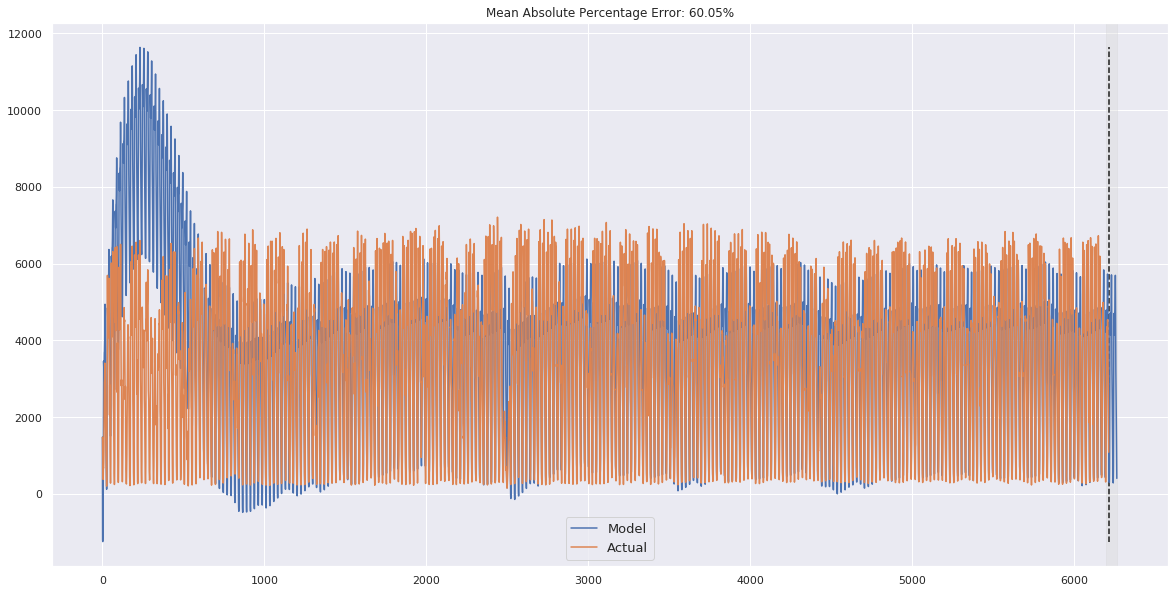

In [40]:
def plotHoltWinters(series, plot_intervals=False, plot_anomalies=False):
    """
        series - dataset with timeseries
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 
    """
    
    plt.figure(figsize=(20, 10))
    plt.plot(model.result, label = "Model")
    plt.plot(series.values, label = "Actual")
    error = mean_absolute_percentage_error(series.values, model.result[:len(series)])
    plt.title("Mean Absolute Percentage Error: {0:.2f}%".format(error))
    
    if plot_anomalies:
        anomalies = np.array([np.NaN]*len(series))
        anomalies[series.values<model.LowerBond[:len(series)]] = \
            series.values[series.values<model.LowerBond[:len(series)]]
        anomalies[series.values>model.UpperBond[:len(series)]] = \
            series.values[series.values>model.UpperBond[:len(series)]]
        plt.plot(anomalies, "o", markersize=10, label = "Anomalies")
    
    if plot_intervals:
        plt.plot(model.UpperBond, "r--", alpha=0.5, label = "Up/Low confidence")
        plt.plot(model.LowerBond, "r--", alpha=0.5)
        plt.fill_between(x=range(0,len(model.result)), y1=model.UpperBond, 
                         y2=model.LowerBond, alpha=0.2, color = "grey")    
        
    plt.vlines(len(series), ymin=min(model.LowerBond), ymax=max(model.UpperBond), linestyles='dashed')
    plt.axvspan(len(series)-20, len(model.result), alpha=0.3, color='lightgrey')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc="best", fontsize=13);
    
plotHoltWinters(df_train.traffic_volume)

In [41]:
# Linear regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, TimeSeriesSplit

# for time-series cross-validation set 5 folds 
tscv = TimeSeriesSplit(n_splits=5)

y_train = df_train.traffic_volume.values
X_train = df_train.drop('traffic_volume', axis=1)
y_test = df_test.traffic_volume.values
X_test = df_test.drop('traffic_volume', axis=1)

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [42]:
def plotModelResults(model, X_train=X_train, X_test=X_test, plot_intervals=False, plot_anomalies=False):
    """
        Plots modelled vs fact values, prediction intervals and anomalies
    
    """
    
    prediction = model.predict(X_test)
    
    plt.figure(figsize=(15, 7))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test, label="actual", linewidth=2.0)
    
    if plot_intervals:
        cv = cross_val_score(model, X_train, y_train, 
                                    cv=tscv, 
                                    scoring="neg_mean_absolute_error")
        mae = cv.mean() * (-1)
        deviation = cv.std()
        
        scale = 1.96
        lower = prediction - (mae + scale * deviation)
        upper = prediction + (mae + scale * deviation)
        
        plt.plot(lower, "r--", label="upper bond / lower bond", alpha=0.5)
        plt.plot(upper, "r--", alpha=0.5)
        
        if plot_anomalies:
            anomalies = np.array([np.NaN]*len(y_test))
            anomalies[y_test<lower] = y_test[y_test<lower]
            anomalies[y_test>upper] = y_test[y_test>upper]
            plt.plot(anomalies, "o", markersize=10, label = "Anomalies")
    
    error = mean_absolute_percentage_error(prediction, y_test)
    plt.title("Mean absolute percentage error {0:.2f}%".format(error))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);

def plotCoefficients(model):
    """
        Plots sorted coefficient values of the model
    """
    
    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    
    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed');

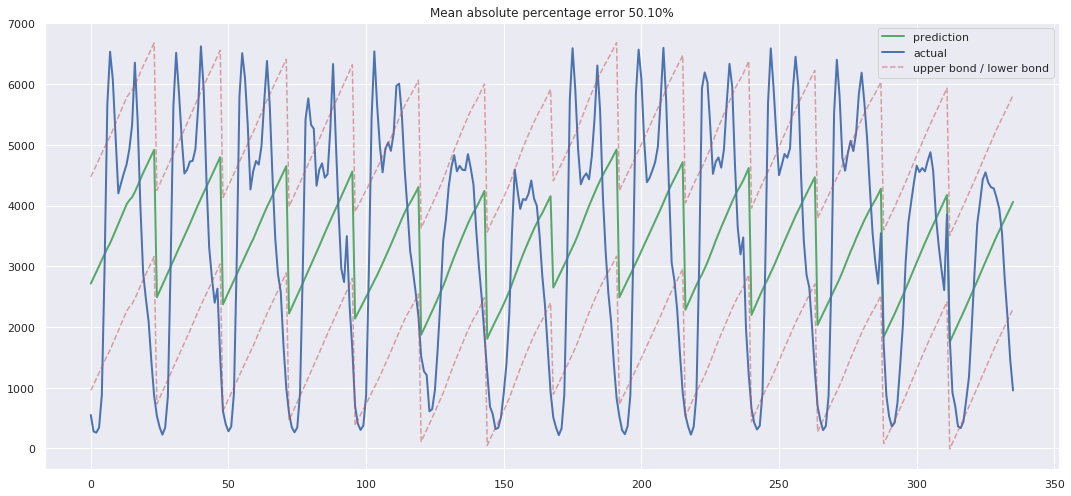

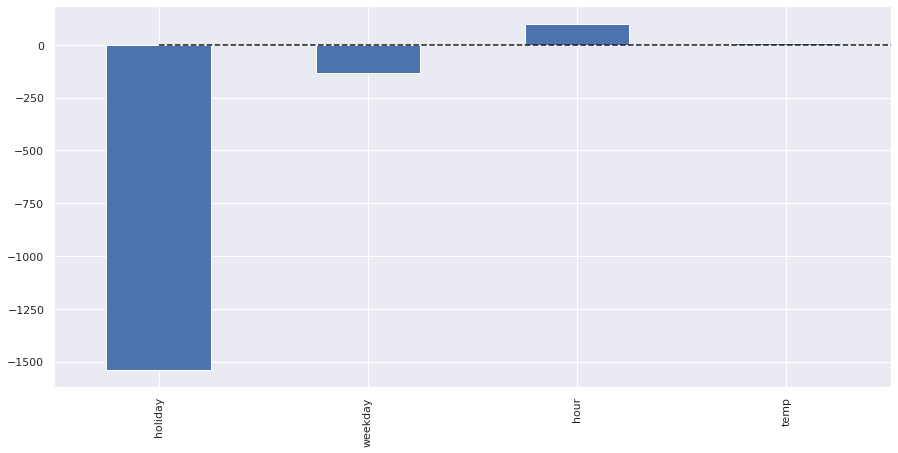

In [45]:
plotModelResults(lr, plot_intervals=True)
plotCoefficients(lr)

In [46]:
# Lets use StandardScaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

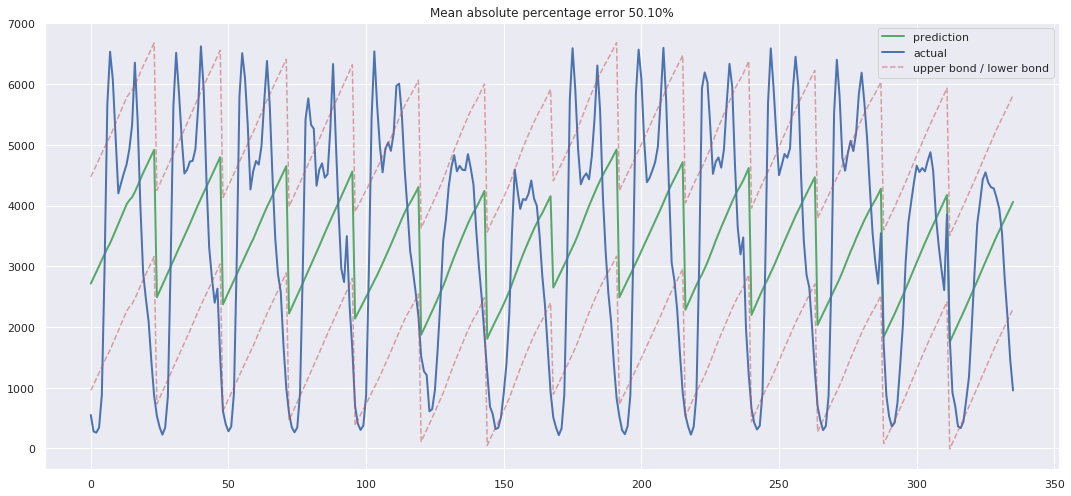

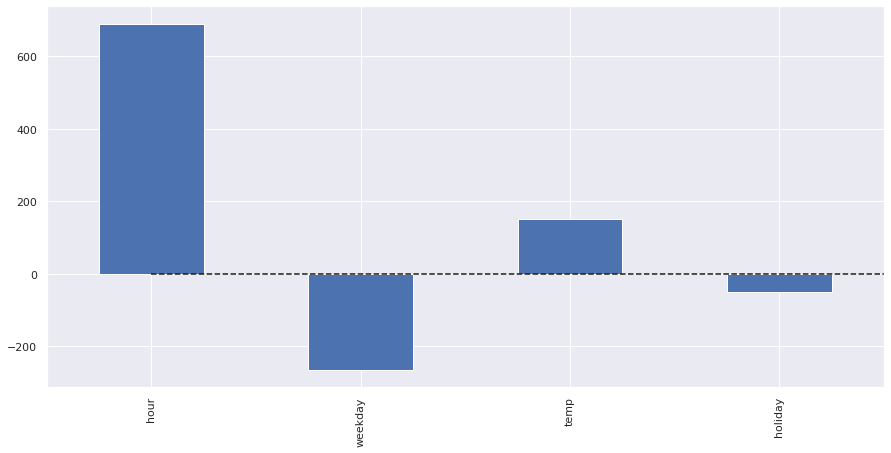

In [47]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

plotModelResults(lr, X_train=X_train_scaled, X_test=X_test_scaled, plot_intervals=True)
plotCoefficients(lr)

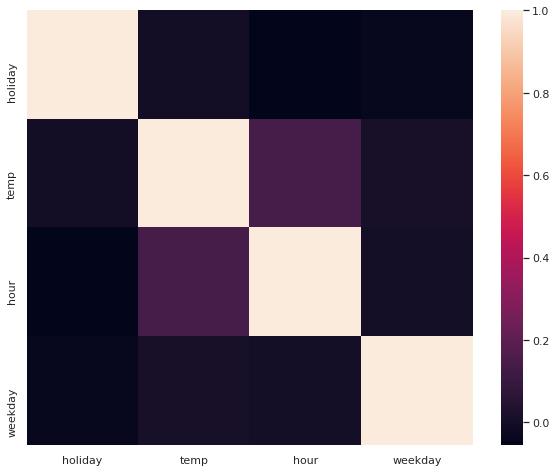

In [48]:
plt.figure(figsize=(10, 8))
sns.heatmap(X_train.corr());

In [49]:
# XBOOST

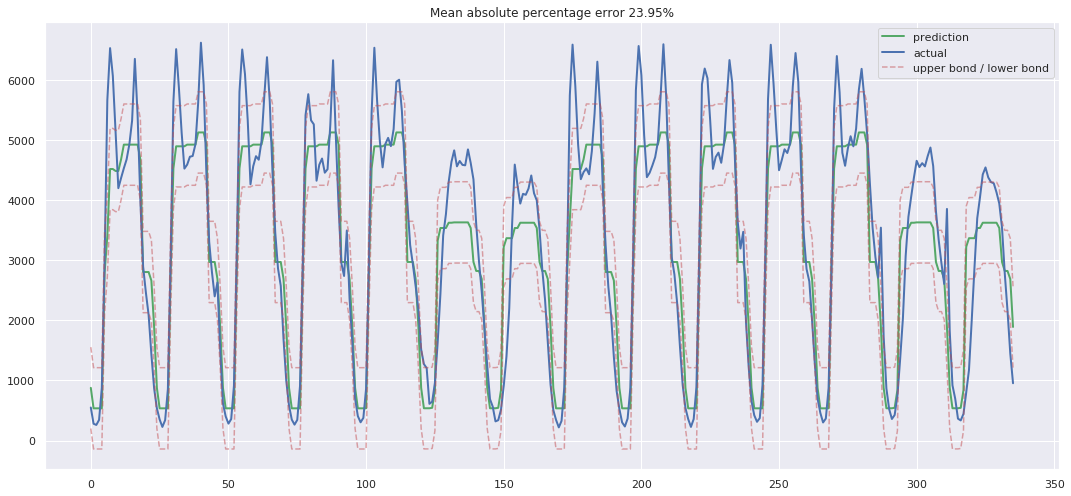

In [50]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

gbr = AdaBoostRegressor(n_estimators=100)
gbr.fit(X_train_scaled, y_train)

plotModelResults(gbr, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True)

In [73]:
from gluonts.dataset.common import ListDataset
training_data = ListDataset(
    [{"start": df_train.index[0], "target": df_train.traffic_volume.values}],
#     [{"start": df_train.index[0], "target": df_train[c].values} for c in df_train.columns],
    freq = "h"
)

training_data.list_data

[{'start': Timestamp('2018-01-01 00:00:00'),
  'target': array([1478., 1408.,  931., ..., 2623., 1725., 1088.])}]

In [74]:
from gluonts.model.deepar import DeepAREstimator
from gluonts.trainer import Trainer

estimator = DeepAREstimator(
    freq="h", 
    prediction_length=672, 
    trainer=Trainer(epochs=4)
)
predictor = estimator.train(training_data=training_data)

100%|██████████| 50/50 [02:27<00:00,  2.95s/it, epoch=4/4, avg_epoch_loss=6.94]


In [76]:
test_data = ListDataset(
#     [{"start": df_test.index[0], "target": df_test[c].values} for c in df_test.columns],
    [{"start": df_test.index[0], "target": df_test.traffic_volume.values}],
    freq = "h"
)

test_data.list_data

[{'start': Timestamp('2018-09-17 00:00:00'),
  'target': array([ 550.,  280.,  260.,  344.,  880., 2965., 5667., 6533., 6070.,
         5145., 4201., 4371., 4533., 4680., 4930., 5327., 6354., 5412.,
         4000., 2897., 2466., 2090., 1434.,  869.,  536.,  351.,  227.,
          340.,  858., 3027., 5642., 6516., 5873., 5123., 4527., 4593.,
         4725., 4737., 4931., 5623., 6623., 5916., 4423., 3309., 2805.,
         2400., 2631., 1501.,  617.,  401.,  282.,  358.,  913., 3074.,
         5803., 6510., 6101., 5331., 4266., 4567., 4734., 4675., 4980.,
         5718., 6382., 5647., 4469., 3460., 2865., 2576., 1693.,  994.,
          583.,  349.,  265.,  344.,  914., 2924., 5417., 5766., 5331.,
         5264., 4326., 4592., 4695., 4459., 4517., 5257., 6331., 5065.,
         3898., 2957., 2740., 3497., 2356., 1633.,  698.,  407.,  304.,
          377.,  867., 2919., 5457., 6539., 5653., 4981., 4548., 4937.,
         5039., 4901., 5185., 5973., 6007., 5489., 4607., 3958., 3255.,
         

In [77]:
for test_entry, forecast in zip(test_data, predictor.predict(test_data)):
    to_pandas(test_entry).plot(linewidth=2, figsize=(15, 7), label="historical values")
    forecast.plot(color='g', prediction_intervals=[50.0, 90.0], label="forecast")
    
plt.legend(loc='upper left')
plt.grid(axis='x')

MXNetError: vector::_M_range_insert